 # Lab 1

In [28]:
#author: Gantumur Tsogtgerel, with help from Tuguldur Sukhbold
#code modified by Kabilan Sriranjan for Lab 1
import numpy as np
import matplotlib.pyplot as plt
import random as rn
import math
import scipy.misc
from PIL import Image

In [29]:
def expser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for exp
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    b=1.
    y=b
    for i in range(1,n+1):
        b*=float(x)/i
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y

In [30]:
def expserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(expser(n,x,eps))
    return ylist

In [31]:
def errxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [32]:
def errelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

In [33]:
def errnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(expser(n,x,eps)-np.exp(x))
    return yy

## Exercise 1
### 1.2

Each of the plots below show the error vs n plot with a different $\epsilon$, ranging from 0.01 to 0.20. In each plot there are 5 different values of x tested ranging from -5.5 to 4.5. It is clear that the threshold for where increasing n does not improve the accuracy of the Taylor approximation decreases when $\epsilon$ grows. When $\epsilon$=0.01 the threshold is around n=10 but when $\epsilon$=0.20 the threshold is closer to n=5. It can also be seen that the threshold increases when the value of x is close to 0. 

Possible explanations for this behaviour is that when $\epsilon$ is too large, the magnitudes of the terms of the Taylor polynomial become smaller than the actual errors so adding more terms does not improve accuracy. Also when x is close to 0 terms of the Taylor polynomial decay faster so we reach the threshold earlier.

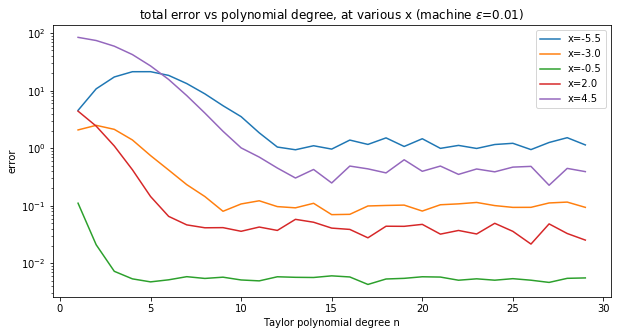

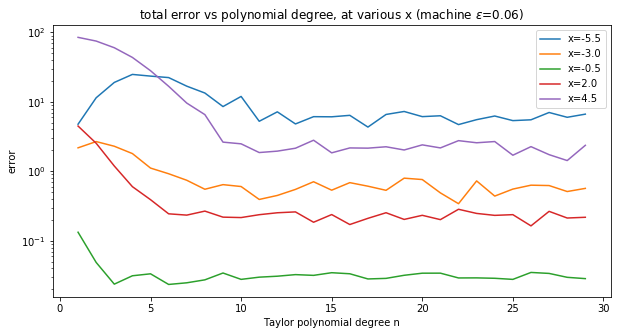

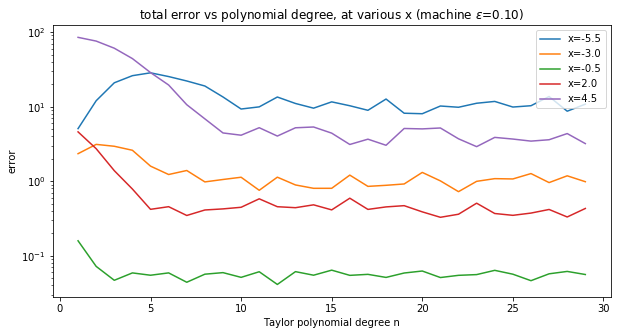

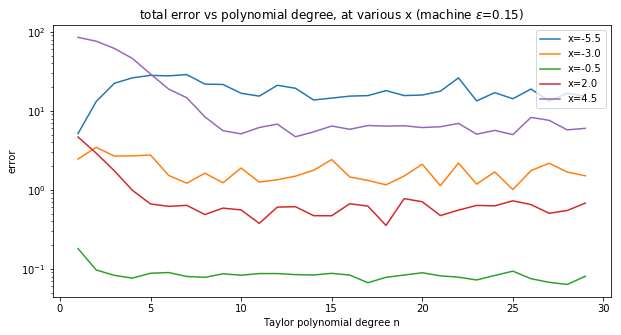

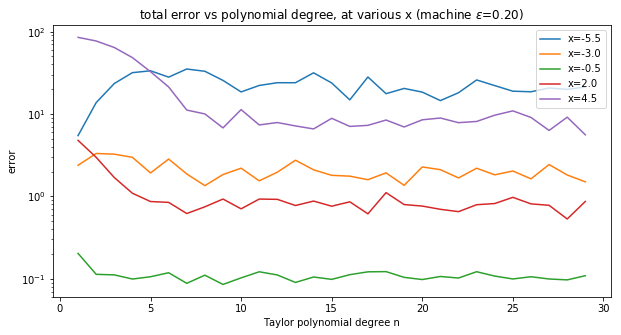

In [34]:
xlist = np.linspace(-5.5,4.5,5)
nlist=range(1,30)
epslist = np.linspace(0.01, 0.2, 5)
kmax=20

for e in epslist:
    plt.figure(figsize=(10,5))
    for x in xlist:
        y=np.abs(errnlist(nlist,x,e))
        for k in range(1,kmax):
            z=np.abs(errnlist(nlist,x,e))
            y=np.maximum(y,z)
        plt.plot(nlist,y,label='x=%.1f'%x)

    plt.yscale('log')
    #plt.xscale('log')
    plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%e)
    plt.xlabel('Taylor polynomial degree n')
    plt.ylabel('error')
    plt.legend()
    plt.show()

### 1.3

The plots below show the graph of $e^x$, the absolute error, and the relative error.

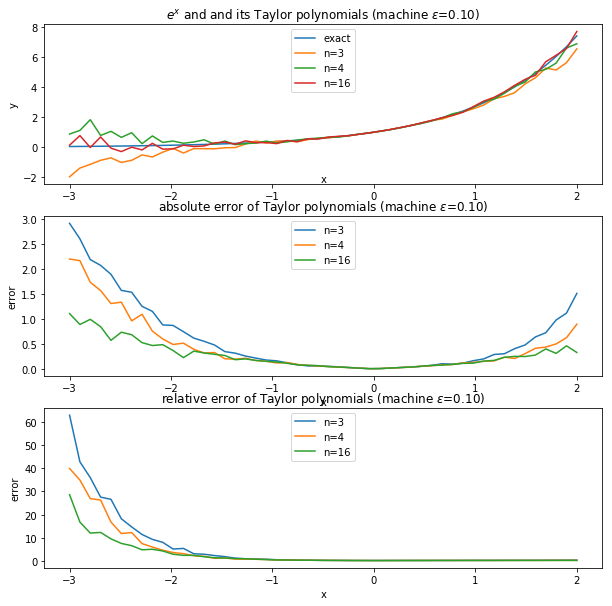

In [35]:
xlist = np.linspace(-3, 2, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1.plot(xlist,np.exp(xlist),label='exact')
for n in nlist: 
    ax1.plot(xlist,expserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(errxlist(n,xlist,eps))
        y=np.maximum(y,z)
    y = y/np.exp(xlist)
    ax3.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$e^x$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'absolute error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
ax3.set_title(r'relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax3.set_xlabel('x')
ax3.set_ylabel('error')
ax3.legend(loc="upper center")
plt.show()

### 1.4

I will repeat the previous analysis but on the function erf(x). The Taylor series is given by

$$
erf(x) = \frac{2}{\sqrt{\pi}}\sum_{n=0}^\infty\frac{(-1)^nx^{2n+1}}{n!(2n+1)} = \frac{2}{\sqrt{\pi}}\Big( x - \frac{x^3}{3} + \frac{x^5}{10} - \frac{x^7}{42} + \frac{x^9}{216} - \dots \Big)
$$


In [36]:
def erfser(n,x,eps=0):
#truncated Maclaurin series (i.e., Taylor polynomial) for erf
# n - degree of the Taylor polynomial
# x - the argument
# eps - relative error in computation of the series terms, modeled by uniform noise
    y = 0
    power = 1
    while power < n:
        b = (-1)**((power-1)/2) * x**power / (math.factorial((power-1)/2) * power)
        power = power+2
        r=2*eps*rn.random()-eps
        y+=b*(1.+r)
    return y*2/math.sqrt(math.pi)

In [37]:
def erfserlist(n,xlist,eps=0):
#works with *list* of x
    ylist = []
    for x in xlist:
        ylist.append(erfser(n,x,eps))
    return ylist

In [38]:
def erferrxlist(n,xlist,eps):
#difference between Tn(x) and e^x
#works with *list* of x
    yy = []
    for x in xlist: 
        yy.append(erfser(n,x,eps)-math.erf(x))
    return yy

In [39]:
def erferrelist(n,x,elist):
#difference between Tn(x) and e^x
#works with *list* of eps
    yy = []
    for eps in elist: 
        yy.append(erfser(n,x,eps)-math.erf(x))
    return yy

In [40]:
def erferrnlist(nlist,x,eps):
#difference between Tn(x) and e^x
#works with *list* of n
    yy = []
    for n in nlist: 
        yy.append(erfser(n,x,eps)-math.erf(x))
    return yy

The following are the plots to assess the threshold where increasing the order of the Taylor polynomial doesn't improve the accuracy. The same range of parameters used for $e^x$ is used here.

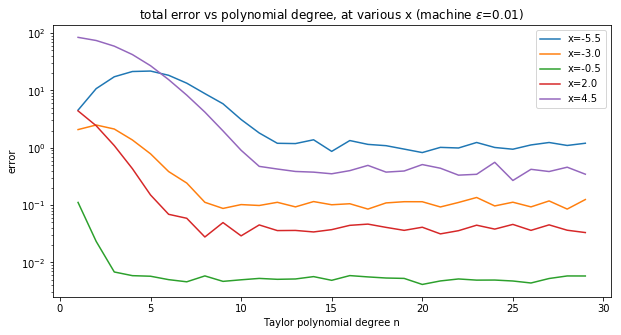

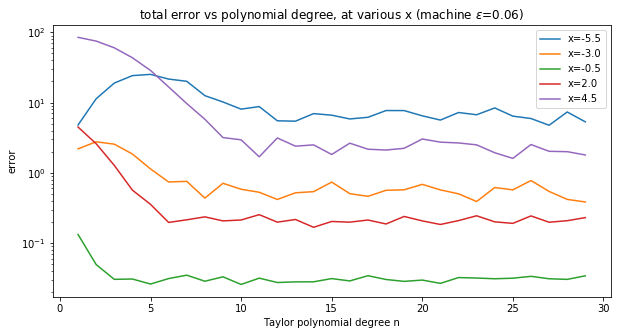

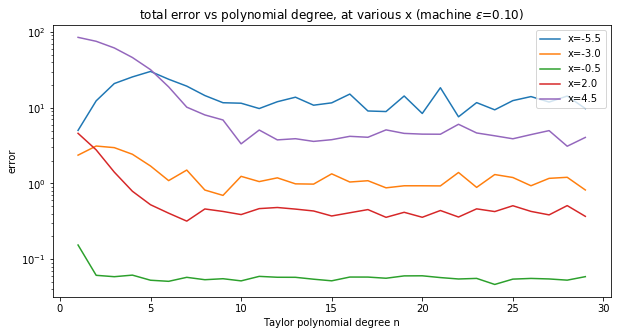

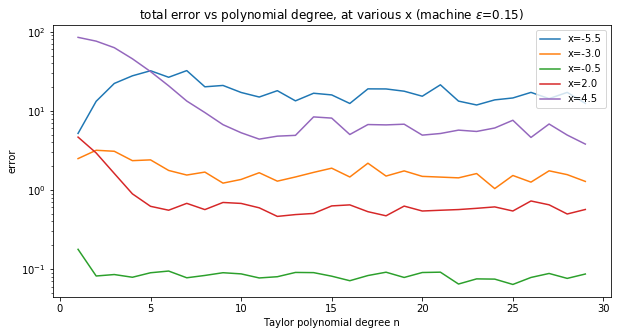

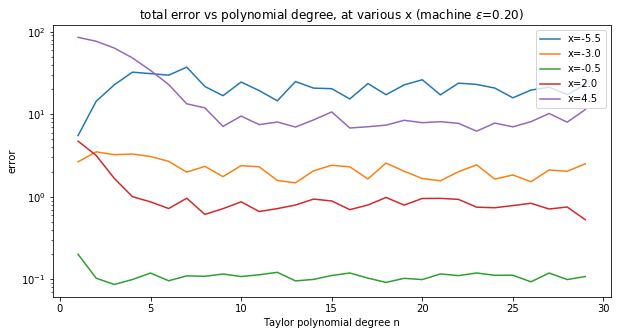

In [41]:
xlist = np.linspace(-5.5,4.5,5)
nlist=range(1,30)
epslist = np.linspace(0.01, 0.2, 5)
kmax=20

for e in epslist:
    plt.figure(figsize=(10,5))
    for x in xlist:
        y=np.abs(errnlist(nlist,x,e))
        for k in range(1,kmax):
            z=np.abs(errnlist(nlist,x,e))
            y=np.maximum(y,z)
        plt.plot(nlist,y,label='x=%.1f'%x)

    plt.yscale('log')
    #plt.xscale('log')
    plt.title(r'total error vs polynomial degree, at various x (machine $\varepsilon$=%.2f)'%e)
    plt.xlabel('Taylor polynomial degree n')
    plt.ylabel('error')
    plt.legend()
    plt.show()

The plots below compare the graph of the "true" erf function to the absolute and relative errors.

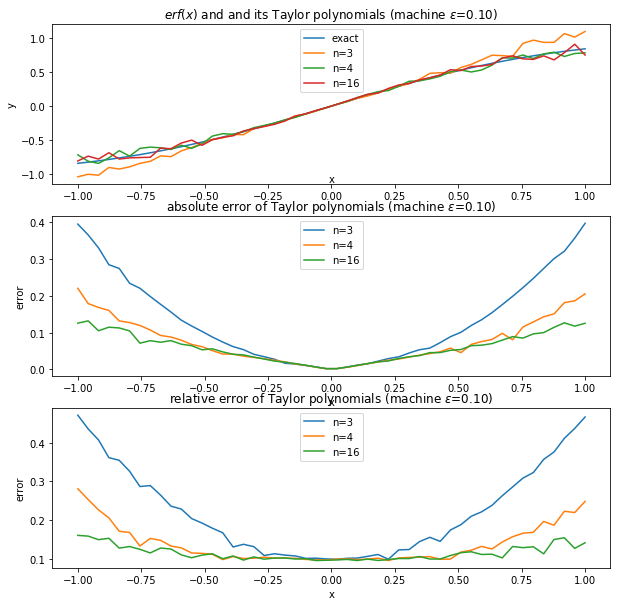

In [42]:
xlist = np.linspace(-1, 1, 50)
nlist = [3,4,16]
eps=.1
kmax=30

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

trueErf = list(map(math.erf, xlist))
ax1.plot(xlist, trueErf, label='exact')
for n in nlist: 
    ax1.plot(xlist,erfserlist(n,xlist,eps),label='n=%d'%n)
plt.legend()
for n in nlist: 
    y=np.abs(errxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(erferrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    ax2.plot(xlist,y,label='n=%d'%n)
for n in nlist: 
    y=np.abs(erferrxlist(n,xlist,eps))
    for k in range(1,kmax):
        z=np.abs(erferrxlist(n,xlist,eps))
        y=np.maximum(y,z)
    y = np.abs(y/trueErf)
    ax3.plot(xlist,y,label='n=%d'%n)

ax1.set_title(r'$erf(x)$ and and its Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper center")
ax2.set_title(r'absolute error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax2.set_xlabel('x')
ax2.set_ylabel('error')
ax2.legend(loc="upper center")
ax3.set_title(r'relative error of Taylor polynomials (machine $\varepsilon$=%.2f)'%eps)
ax3.set_xlabel('x')
ax3.set_ylabel('error')
ax3.legend(loc="upper center")
plt.show()

## Exercise 2
### 2.1

Near the roots, there are large monochromatic regions. This is likely due to the local convergence property of Newton's method. When the initial guess is already close to the root the convergence is very fast. Thus the only place where there shouldn't be a monochromatic region is where we are close to multiple roots simultaneously.

### 2.2

Below is the code to display the basins of attractions for the three roots but zoomed in on the point (0, 0). I couldn't get the graphic to display in Jupyter but it will save to a file called zoom1.png.
A possible explanation for the fractal nature of the boundary is that the tangent line for z=0 is perfectly flat. Newton's method for finding roots uses the fact that the root of the tangent line is close to the root of the actual function. However near the point z=0 the tangent line is almost parallel to the x-axis so its roots are very far away. Moving the initial z just a little bit has a huge effect on the tangent line when we are close to 0. Hence a small change in z in this region will cause Newton's method to converge to a different root.

In [43]:
#Newton-Raphson iteration for z**3-1=0
def phi(z):
    z=complex(z)
    return z+(1/(z*z)-z)/3
#cubic roots of 1
zz=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
cc=[[0,1,1],[1,0.75,0.85],[1,1,1]]

ValueError: Floating point image RGB values must be in the 0..1 range.

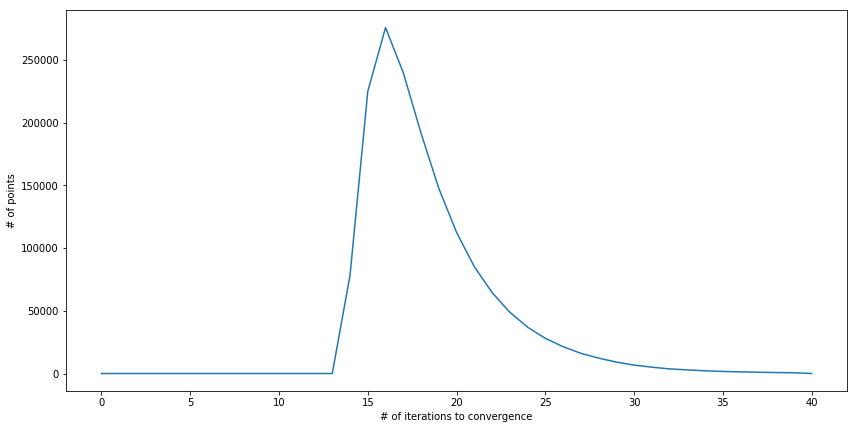

In [44]:
xmin = -0.05
xmax = 0.05
ymin = -0.05
ymax = 0.05
eps = .0001
maxit = 40
imgx = 900
imgy = 900
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=35
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi(z0)
            con=False
            for l in range(len(zz)):
                if abs(z-zz[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in cc[l]]
                h[k]+=2
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('zoom1.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### 2.3

below I repeat the fractal experiment but with the function $f(z) = z^3+z^2+z+1$. The iteration function is given by 
$$
\phi(z) = z - \frac{z^3+z^2+z+1}{3z^2+2z+1}
$$

and the roots are -1, -i and i. If the plot doesn't show in Jupyter it will be saved as zoom2.png.

The same behaviour happens with this function, just at different location. The fractal bits are smaller for this one too. This is likely because the derivative of this polynomial is not close to 0 for as many points within the plotted region. 

In [45]:
#Newton-Raphson iteration for z**3+z**2+z+1=0
def phi2(z):
    z=complex(z)
    z2 = z*z
    z3 = z*z*z
    return z - ((z3+z2+z+1)/(3*z2+2*z+1))
#cubic roots of 1
roots=[-1,complex(0,-1),complex(0,1)]
#corresponding colors
colours=[[0.5,0.8,0.6],[0.8,0.6,0.9],[0.9,0.9,0.6]]

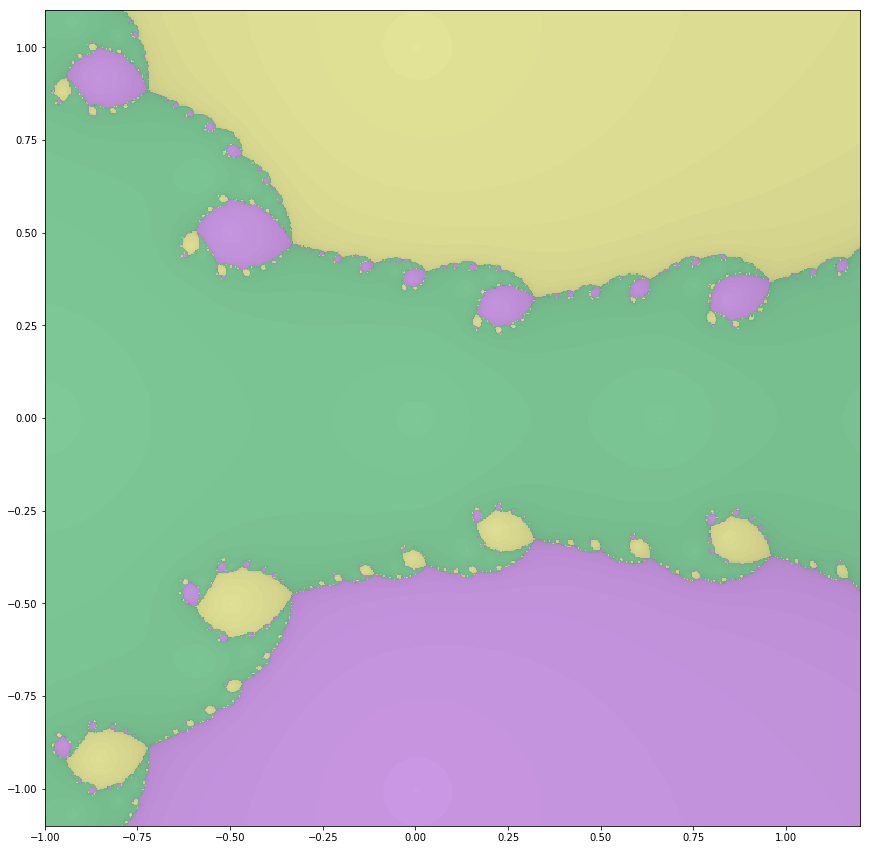

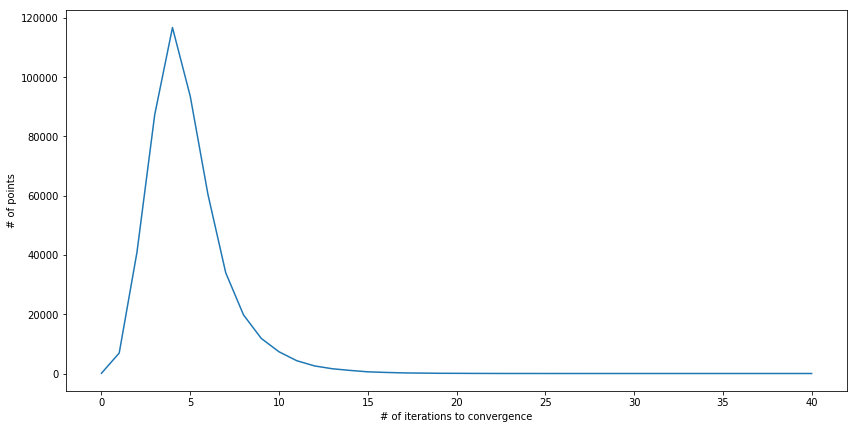

In [46]:
xmin = -1.
xmax = 1.2
ymin = -1.1
ymax = 1.1
eps = .0001
maxit = 40
imgx = 700
imgy = 700
img = np.zeros((imgy,imgx,3))
a = (xmax-xmin)/imgx
b = (ymax-ymin)/imgy
h = np.zeros(maxit+1)
sit=100
f = 1./sit
for i in range(imgy):
    for j in range(imgx):
        x=xmin+a*j
        y=ymax-b*i
        z0=complex(x,y)
        for k in range(maxit):
            if abs(z0)<eps:
                h[maxit]+=1
                break
            z=phi2(z0)
            con=False
            for l in range(len(roots)):
                if abs(z-roots[l])<eps:
                    con=True
                    break
            if(con):
                img[i,j]=[(sit-k)*f*c for c in colours[l]]
                h[k]+=1
                break
            z0=z
        if k==maxit: h[maxit]+=1
plt.figure(figsize=(15,15))
plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
plt.show()
scipy.misc.imsave('zoom2.png', img)
plt.figure(figsize=(14,7))
plt.plot(range(maxit+1),h)
plt.xlabel('# of iterations to convergence')
plt.ylabel('# of points')
plt.show()

### 2.4

Below is the code implementing $\phi$ as defined in Steffenson's method. Using the polynomial $f(z)=z^3-1$, the iteration is given by

$$
\phi(z) = z - \frac{\omega (z^3 - 1)^2}{(z+\omega (z^3 - 1))^3- z^3}
$$

Below are three plots using the values 1, 0.1, and 10 for $\omega$. If they do not show up in browser they are also saved as png files named steff0.1, steff1 and steff10.

The plots are much uglier than for Newton's method, as for most of the points we did not encounter any sort of convergence. This is especially true for large values of $\omega$.
Steffensen's method also displays fractal-like images as before. This is likely due to the fact that while this method doesn't explicitly use the derivative of f, it uses a secant line for the points $(x,f(x))$ and $(x+\omega f(x),f(x+\omega f(x))$ Thus we can use the same explanation as for Newton's method but with the secant line instead of the tangent line. when $f(x)$ and $f(x+\omega f(x))$ are close, the secant line is almost horizontal so the intercept varies wildly with small changes in x. 

In [47]:
#Newton-Raphson iteration for z**3-1=0
def steffphi(z, w):
    z=complex(z)
    fz = z*z*z - 1
    return z - (w*(fz**2))/((z+w*fz)**3 - z*z*z)
#cubic roots of 1
steffroots=[1,complex(-.5,.5*np.sqrt(3)),complex(-.5,-.5*np.sqrt(3))]
#corresponding colors
steffcolours=[[1,0,0],[0,1,.5],[0,0,1]]

ValueError: Floating point image RGB values must be in the 0..1 range.

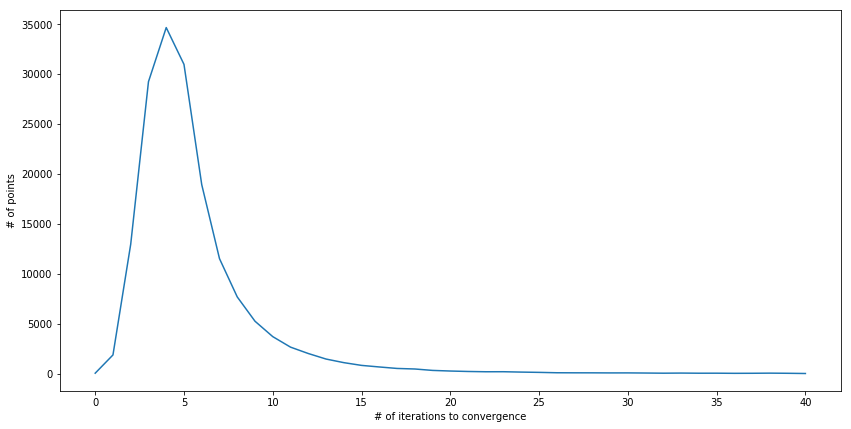

ValueError: Floating point image RGB values must be in the 0..1 range.

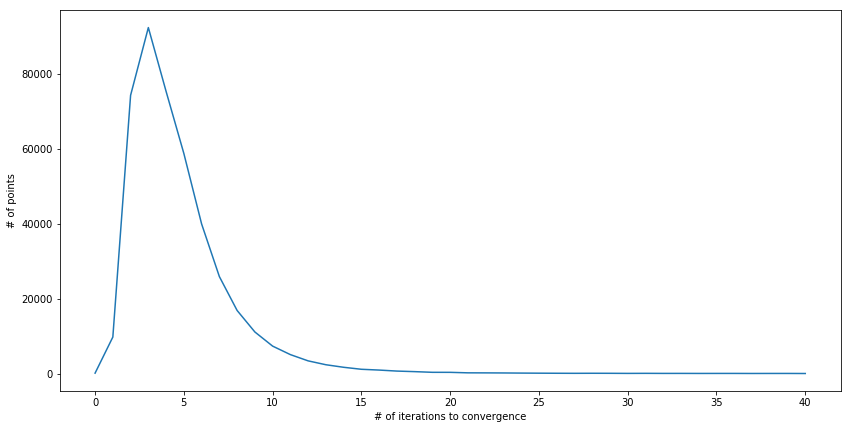

ValueError: Floating point image RGB values must be in the 0..1 range.

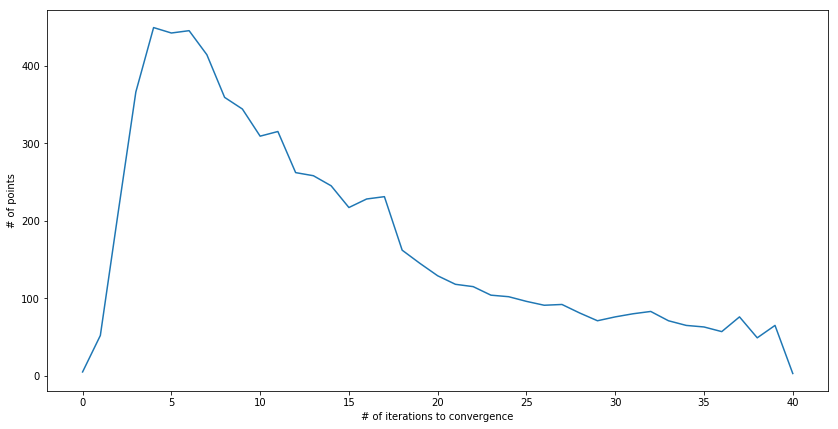

In [48]:
omegas = [1,0.1,10]
for w in omegas:
    xmin = -1.
    xmax = 1.2
    ymin = -1.1
    ymax = 1.1
    eps = .0001
    maxit = 40
    imgx = 700
    imgy = 700
    img = np.zeros((imgy,imgx,3))
    a = (xmax-xmin)/imgx
    b = (ymax-ymin)/imgy
    h = np.zeros(maxit+1)
    sit=20
    f = 1./sit
    for i in range(imgy):
        for j in range(imgx):
            x=xmin+a*j
            y=ymax-b*i
            z0=complex(x,y)
            for k in range(maxit):
                if abs(z0)<eps:
                    h[maxit]+=1
                    break
                z=steffphi(z0,w)
                con=False
                for l in range(len(steffroots)):
                    if abs(z-steffroots[l])<eps:
                        con=True
                        break
                if(con):
                    img[i,j]=[(sit-k)*f*c for c in steffcolours[l]]
                    h[k]+=1
                    break
                z0=z
            if k==maxit: h[maxit]+=1
    plt.figure(figsize=(15,15))
    plt.imshow(img,extent=[xmin,xmax,ymin,ymax])
    plt.show()
    scipy.misc.imsave('steff'+str(w)+'.png', img)
    plt.figure(figsize=(14,7))
    plt.plot(range(maxit+1),h)
    plt.xlabel('# of iterations to convergence')
    plt.ylabel('# of points')
    plt.show()

### 2.5

We are attempting to solve f(x) = 0 using an iteration function $\phi$, given by 

$$
\phi(x) = x - w(x)(f(x)
$$

In Steffensen's method we use

$$
w(x) = \frac{\omega f(x)}{f(x+\omega f(x)) - f(x)}
$$

If $\alpha$ is the root we can Taylor expand $\phi$ near $\alpha$

$$
\phi(x) = \phi(\alpha) + (x-\alpha)\phi'(\alpha) + \frac{\phi''(\xi)}{2}(x-\alpha)^2
$$

The derivative of $\phi$ in the real case is given by

$$
\phi'(x) = 1 - \frac{2\omega(f(x+\omega f(x))-f(x))f(x)f'(x) - \omega(f'(x+\omega f(x))(1+\omega f'(x)) - f'(x))f(x)^2}{(f(x+\omega f(x))-f(x))^2}
$$

Letting $\phi'(x)=0$ we get that $\phi(x) - \alpha = M(x-\alpha)^2$ where M is any constant, local bound for $\frac{\phi''(\xi)}{2}$ 

Hence Steffensen's method is also quadratically convergent using almost the same proof as for Newton's method.